In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Read the datasets
weather_data = pd.read_csv('weather_data.csv')
energy_usage_data = pd.read_csv('energy_data.csv')

In [3]:
# weather_data
(weather_data)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,27.48,clear-day,0.35,10.00,Clear,1023.54,10.54,0.24,1420052400,311,0.0,3.21,0.0
8756,27.17,partly-cloudy-day,0.35,10.00,Partly Cloudy,1023.60,9.53,0.25,1420056000,297,0.0,3.45,0.0
8757,25.72,clear-day,0.37,10.00,Clear,1023.44,8.12,0.08,1420059600,292,0.0,3.20,0.0
8758,22.75,clear-night,0.42,10.00,Clear,1023.29,4.43,0.05,1420063200,299,0.0,3.13,0.0


In [4]:
# energy_usage_data
(energy_usage_data)

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2014-12-31 21:30:00,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906
17516,2014-12-31 22:00:00,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162
17517,2014-12-31 22:30:00,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604
17518,2014-12-31 23:00:00,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409


In [5]:
# Q1.
# Parse time fields
weather_data['time'] = pd.to_datetime(weather_data['time'], unit='s')
energy_usage_data['Date & Time'] = pd.to_datetime(energy_usage_data['Date & Time'])

# Calculate daily energy usage
energy_usage_data['date'] = energy_usage_data['Date & Time'].dt.date
daily_energy_usage = energy_usage_data.groupby('date')['use [kW]'].sum().reset_index()

# Convert datetime column to same data type
daily_energy_usage['date'] = pd.to_datetime(daily_energy_usage['date'])

# Merge datasets
merged_data = pd.merge(weather_data, daily_energy_usage, left_on='time', right_on='date')

In [6]:
(merged_data)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,date,use [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,0.0000,23.89,0.00,2014-01-01,65.013592
1,20.91,clear-night,0.57,10.00,Clear,1028.12,2.07,0.19,2014-01-02,23,0.0000,8.23,0.00,2014-01-02,32.305336
2,9.38,snow,0.81,1.37,Light Snow,1014.33,12.84,1.00,2014-01-03,30,0.0034,4.66,0.12,2014-01-03,31.164468
3,1.72,clear-night,0.57,10.00,Clear,1028.10,7.53,0.00,2014-01-04,325,0.0000,-10.02,0.00,2014-01-04,45.287782
4,19.69,clear-night,0.50,10.00,Clear,1026.36,8.26,0.00,2014-01-05,196,0.0000,3.93,0.00,2014-01-05,36.316643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,35.08,clear-night,0.74,10.00,Clear,1021.86,3.64,0.00,2014-12-27,236,0.0000,27.53,0.00,2014-12-27,35.046127
361,36.15,clear-night,0.80,9.91,Clear,1020.43,3.33,0.06,2014-12-28,186,0.0000,30.62,0.00,2014-12-28,37.695824
362,40.13,clear-night,0.63,10.00,Clear,1014.32,9.34,0.16,2014-12-29,292,0.0000,28.68,0.00,2014-12-29,28.675929
363,30.73,clear-night,0.51,10.00,Clear,1022.70,7.19,0.04,2014-12-30,311,0.0000,14.72,0.00,2014-12-30,31.514313


In [7]:
# Q2. 
# Filter the merged_data to only include data before the month of December
train_data = merged_data.loc[(merged_data['date'].dt.month != 12)]

# Create a test set with only December data
test_data = merged_data.loc[(merged_data['date'].dt.month == 12)]

In [8]:
train_data

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,date,use [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,0.0000,23.89,0.00,2014-01-01,65.013592
1,20.91,clear-night,0.57,10.00,Clear,1028.12,2.07,0.19,2014-01-02,23,0.0000,8.23,0.00,2014-01-02,32.305336
2,9.38,snow,0.81,1.37,Light Snow,1014.33,12.84,1.00,2014-01-03,30,0.0034,4.66,0.12,2014-01-03,31.164468
3,1.72,clear-night,0.57,10.00,Clear,1028.10,7.53,0.00,2014-01-04,325,0.0000,-10.02,0.00,2014-01-04,45.287782
4,19.69,clear-night,0.50,10.00,Clear,1026.36,8.26,0.00,2014-01-05,196,0.0000,3.93,0.00,2014-01-05,36.316643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,41.87,clear-night,0.58,10.00,Clear,1016.54,4.02,0.06,2014-11-26,215,0.0000,28.21,0.00,2014-11-26,27.712850
330,33.05,rain,0.91,1.95,Light Rain,1009.58,14.60,1.00,2014-11-27,6,0.0488,30.66,0.70,2014-11-27,30.114004
331,30.54,cloudy,0.85,7.64,Overcast,1016.39,1.90,1.00,2014-11-28,335,0.0000,26.64,0.00,2014-11-28,26.348404
332,25.40,clear-night,0.65,10.00,Clear,1022.73,6.71,0.07,2014-11-29,282,0.0000,15.29,0.00,2014-11-29,20.241298


In [9]:
test_data

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,date,use [kW]
334,44.86,cloudy,0.69,10.00,Overcast,1017.71,5.52,1.00,2014-12-01,188,0.0000,35.50,0.00,2014-12-01,30.550010
335,40.77,clear-night,0.64,10.00,Clear,1026.86,10.13,0.19,2014-12-02,306,0.0000,29.59,0.00,2014-12-02,31.748857
336,31.63,snow,0.81,7.27,Flurries,1035.05,5.34,1.00,2014-12-03,60,0.0019,26.61,0.05,2014-12-03,28.773233
337,43.58,cloudy,0.81,9.63,Overcast,1014.62,10.97,1.00,2014-12-04,250,0.0020,38.13,0.05,2014-12-04,39.484491
338,29.27,clear-night,0.67,10.00,Clear,1032.39,3.13,0.06,2014-12-05,343,0.0000,19.67,0.00,2014-12-05,33.342503
339,34.65,cloudy,0.66,9.05,Overcast,1033.58,4.19,1.00,2014-12-06,71,0.0000,24.34,0.00,2014-12-06,36.470153
340,36.14,rain,0.93,6.62,Rain,1022.18,4.88,1.00,2014-12-07,349,0.0534,34.30,0.71,2014-12-07,26.486585
341,24.73,clear-night,0.44,10.00,Clear,1038.44,11.39,0.01,2014-12-08,14,0.0000,5.95,0.00,2014-12-08,23.013980
342,24.22,cloudy,0.70,10.00,Overcast,1037.63,7.09,1.00,2014-12-09,24,0.0000,15.91,0.00,2014-12-09,27.954351
343,38.18,rain,0.90,3.07,Light Rain,1004.33,16.32,1.00,2014-12-10,5,0.0525,35.49,0.71,2014-12-10,37.422625


In [10]:
# Separate features (X) and target (y) for both training and testing sets
X_train = train_data.drop(['date', 'use [kW]', 'time'], axis=1)
y_train = train_data['use [kW]']
X_test = test_data.drop(['date', 'use [kW]', 'time'], axis=1)
y_test = test_data['use [kW]']

In [11]:
print(X_train.dtypes)
print(X_test.dtypes)

temperature          float64
icon                  object
humidity             float64
visibility           float64
summary               object
pressure             float64
windSpeed            float64
cloudCover           float64
windBearing            int64
precipIntensity      float64
dewPoint             float64
precipProbability    float64
dtype: object
temperature          float64
icon                  object
humidity             float64
visibility           float64
summary               object
pressure             float64
windSpeed            float64
cloudCover           float64
windBearing            int64
precipIntensity      float64
dewPoint             float64
precipProbability    float64
dtype: object


In [12]:
# One-hot encode the categorical columns in both train and test sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure both train and test sets have the same columns after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, axis=1, fill_value=0)


In [13]:
# Q3. 
# Instantiate the LinearRegression model
lr_model = LinearRegression()

In [14]:
# Fit the model to the training data
lr_model.fit(X_train_encoded, y_train)

LinearRegression()

In [15]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_encoded)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 7.180460941817107


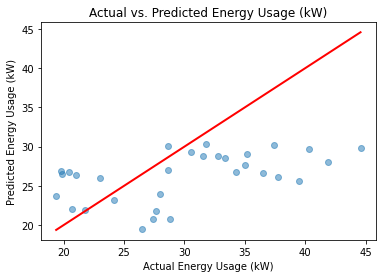

In [16]:
# Create a scatter plot of the actual vs. predicted energy usage values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Energy Usage (kW)')
plt.ylabel('Predicted Energy Usage (kW)')
plt.title('Actual vs. Predicted Energy Usage (kW)')

# Add a reference line representing a perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Display the plot
plt.show()

In [17]:
# Create a new DataFrame with the date and predicted values
pred_df = pd.DataFrame({'date': test_data['date'], 'predicted_value': y_pred})

# Save the DataFrame as a CSV file
pred_df.to_csv('cse351_hw2_Lee_Michael_112424954_linear_regression.csv', index=False)

In [18]:
# Q4. 
# Create copies of train_data and test_data to avoid SettingWithCopyWarning
train_data = train_data.copy()
test_data = test_data.copy()

# Create a binary column 'is_high' in the train_data and test_data DataFrames
# Assign 1 if the temperature is greater than or equal to 35, and 0 otherwise
train_data['is_high'] = np.where(train_data['temperature'] >= 35, 1, 0)
test_data['is_high'] = np.where(test_data['temperature'] >= 35, 1, 0)

In [19]:
# Prepare features (X) and target (y) for both training and testing sets
X_train = train_data.drop(['date', 'is_high', 'temperature'], axis=1)
y_train = train_data['is_high']
X_test = test_data.drop(['date', 'is_high', 'temperature'], axis=1)
y_test = test_data['is_high']

In [20]:
# Preprocess your features (e.g., One-Hot Encoding for categorical variables)
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [21]:
# Instantiate a LogisticRegression model
logistic_model = LogisticRegression()

In [22]:
# Fit the model to the training data
logistic_model.fit(X_train_encoded, y_train)

LogisticRegression()

In [23]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test_encoded)

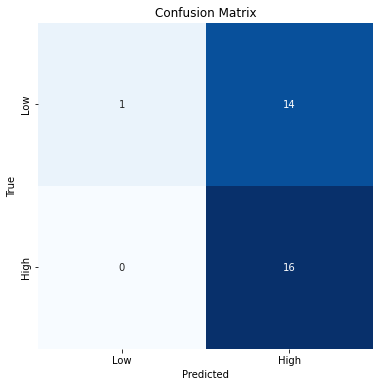

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Caclculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6956521739130436


In [26]:
# Create a new DataFrame with date and predicted classification
classification_output = pd.DataFrame({'date': test_data['date'], 'classification': y_pred})

# Save the DataFrame to a CSV file
classification_output.to_csv('cse351_hw2_Lee_Michael_112424954_logistic_regression.csv', index=False)

In [27]:
# Q5. 
# Filter energy usage data for day and night periods
day_data = energy_usage_data.loc[(energy_usage_data['Date & Time'].dt.hour >= 6) & (energy_usage_data['Date & Time'].dt.hour < 19)]
night_data = energy_usage_data.loc[(energy_usage_data['Date & Time'].dt.hour < 6) | (energy_usage_data['Date & Time'].dt.hour >= 19)]

In [28]:
# Calculate average usage for each device during day and night periods
avg_washer_day = day_data['Washer [kW]'].mean()
avg_washer_night = night_data['Washer [kW]'].mean()


In [29]:
avg_ac_day = day_data['AC [kW]'].mean()
avg_ac_night = night_data['AC [kW]'].mean()


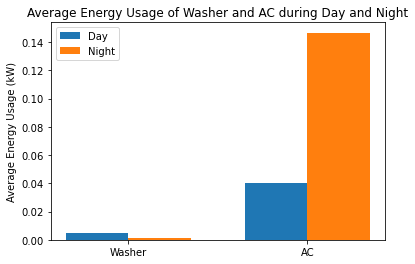

In [30]:
# Plot the results
fig, ax = plt.subplots()
devices = ['Washer', 'AC']
day_usage = [avg_washer_day, avg_ac_day]
night_usage = [avg_washer_night, avg_ac_night]

x = np.arange(len(devices))
width = 0.35

ax.bar(x - width/2, day_usage, width, label='Day')
ax.bar(x + width/2, night_usage, width, label='Night')

ax.set_ylabel('Average Energy Usage (kW)')
ax.set_title('Average Energy Usage of Washer and AC during Day and Night')
ax.set_xticks(x)
ax.set_xticklabels(devices)
ax.legend()

plt.show()

In [31]:
# Analysis:
# It seems plausible that the washer is used more during the day than at night, but with a negligible difference
# because washer can be used during any time without preference. It seems it is used more during the day 
# because that is when people are most active.
# It is however, unexpected that AC energy usage is higher during the night time than day time. I have two ideas why
# this may be. 
# 1: It's possible that the location where the data was collected experiences hotter nights or high humidity levels 
# during the night, which could lead to increased AC usage to maintain comfortable conditions.
# 2: People may have preferences for cooler sleeping environments, which could lead to higher AC usage during the 
# night. 